In [1]:
import pandas as pd
import numpy as np
import os
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

In [6]:
studyData = pd.read_csv("Covid19Study_June2021.csv", index_col="ParticipantID", sep=";")

In [28]:
sample_size = len(studyData)
fps = 44100
n_second = 2

44 khz = 44100 samples per second

## Histograms

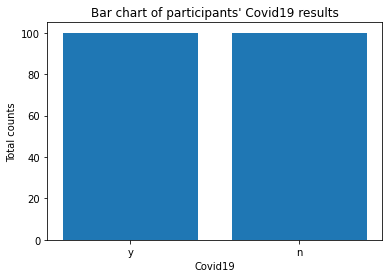

In [15]:
# Plot for covid19
count_per_covid19 = studyData.Covid19.value_counts()
plt.bar(studyData.Covid19, max(count_per_covid19))
plt.title("Bar chart of participants' Covid19 results")
plt.xlabel("Covid19")
plt.ylabel("Total counts")
plt.show()

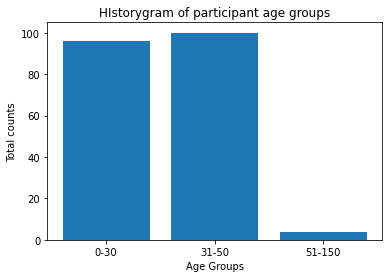

In [25]:
# plot for age group 

histage = np.histogram(studyData.Age, [0, 30, 50, 150])
count_per_age_group = histage[0]

x = np.arange(len(count_per_age_group))
age_groups = ["0-30", "31-50", "51-150"]

fig, ax1 = plt.subplots()
ax1.bar(x, count_per_age_group)
ax1.set_title("HIstorygram of participant age groups")
ax1.set_xlabel("Age Groups")
ax1.set_ylabel("Total counts")
ax1.set_xticks(x)
ax1.set_xticklabels(age_groups)
plt.show()

## Reading recordings

/Users/sanna/Documents/FiTech/2021 Summer/liveProject/Handling sensitive data/milestone 1/Recordings/RecordingParticipant1.wav
true
/Users/sanna/Documents/FiTech/2021 Summer/liveProject/Handling sensitive data/milestone 1/Recordings/RecordingParticipant2.wav
true
/Users/sanna/Documents/FiTech/2021 Summer/liveProject/Handling sensitive data/milestone 1/Recordings/RecordingParticipant3.wav
true
/Users/sanna/Documents/FiTech/2021 Summer/liveProject/Handling sensitive data/milestone 1/Recordings/RecordingParticipant4.wav
true


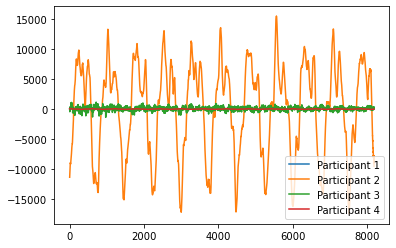

In [36]:
num_of_signal = 8192

current_directory = os.path.join(os.getcwd(), "Recordings/")
signal_samples = np.zeros((sample_size, num_of_signal))

for pid in range(4):
    filename = f"RecordingParticipant{pid+1}.wav"
    full_path = "".join([current_directory, filename])
    if os.path.isfile(full_path):
        fs, data = read(full_path)
        signal_samples[pid] = data[-(num_of_signal+1):-1]
    plt.plot(signal_samples[pid], label=f"Participant {pid+1}")
plt.legend()
plt.show()